# Dog Identification Study Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested in understanding the patterns in the dog breed data to identify the most relevant variables that determine a dog's breed from its photo.

## Inputs

* images/train/
* images/test/
* labels.csv

## Outputs

* Generate code that analyzes the image data and can be used to build a Streamlit app for dog breed identification.






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/home/jaaz/Desktop/project-5/TailTeller/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("New current directory:", os.getcwd())

New current directory: /home/jaaz/Desktop/project-5/TailTeller


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/home/jaaz/Desktop/project-5/TailTeller'

---

# Load Data

Since the data is image-based, we'll use a Python library like PIL to load an example image to understand the structure.

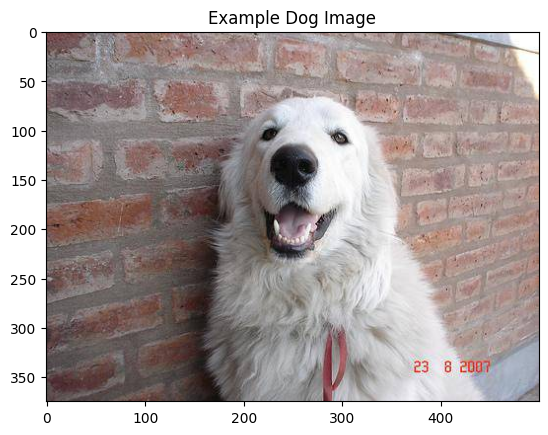

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# Load an example image
image_path = 'images/train/0a0c223352985ec154fd604d7ddceabd.jpg'
image = Image.open(image_path)
plt.imshow(image)
plt.title("Example Dog Image")
plt.show()

In the following code we can check a countplot on the dog breeds:

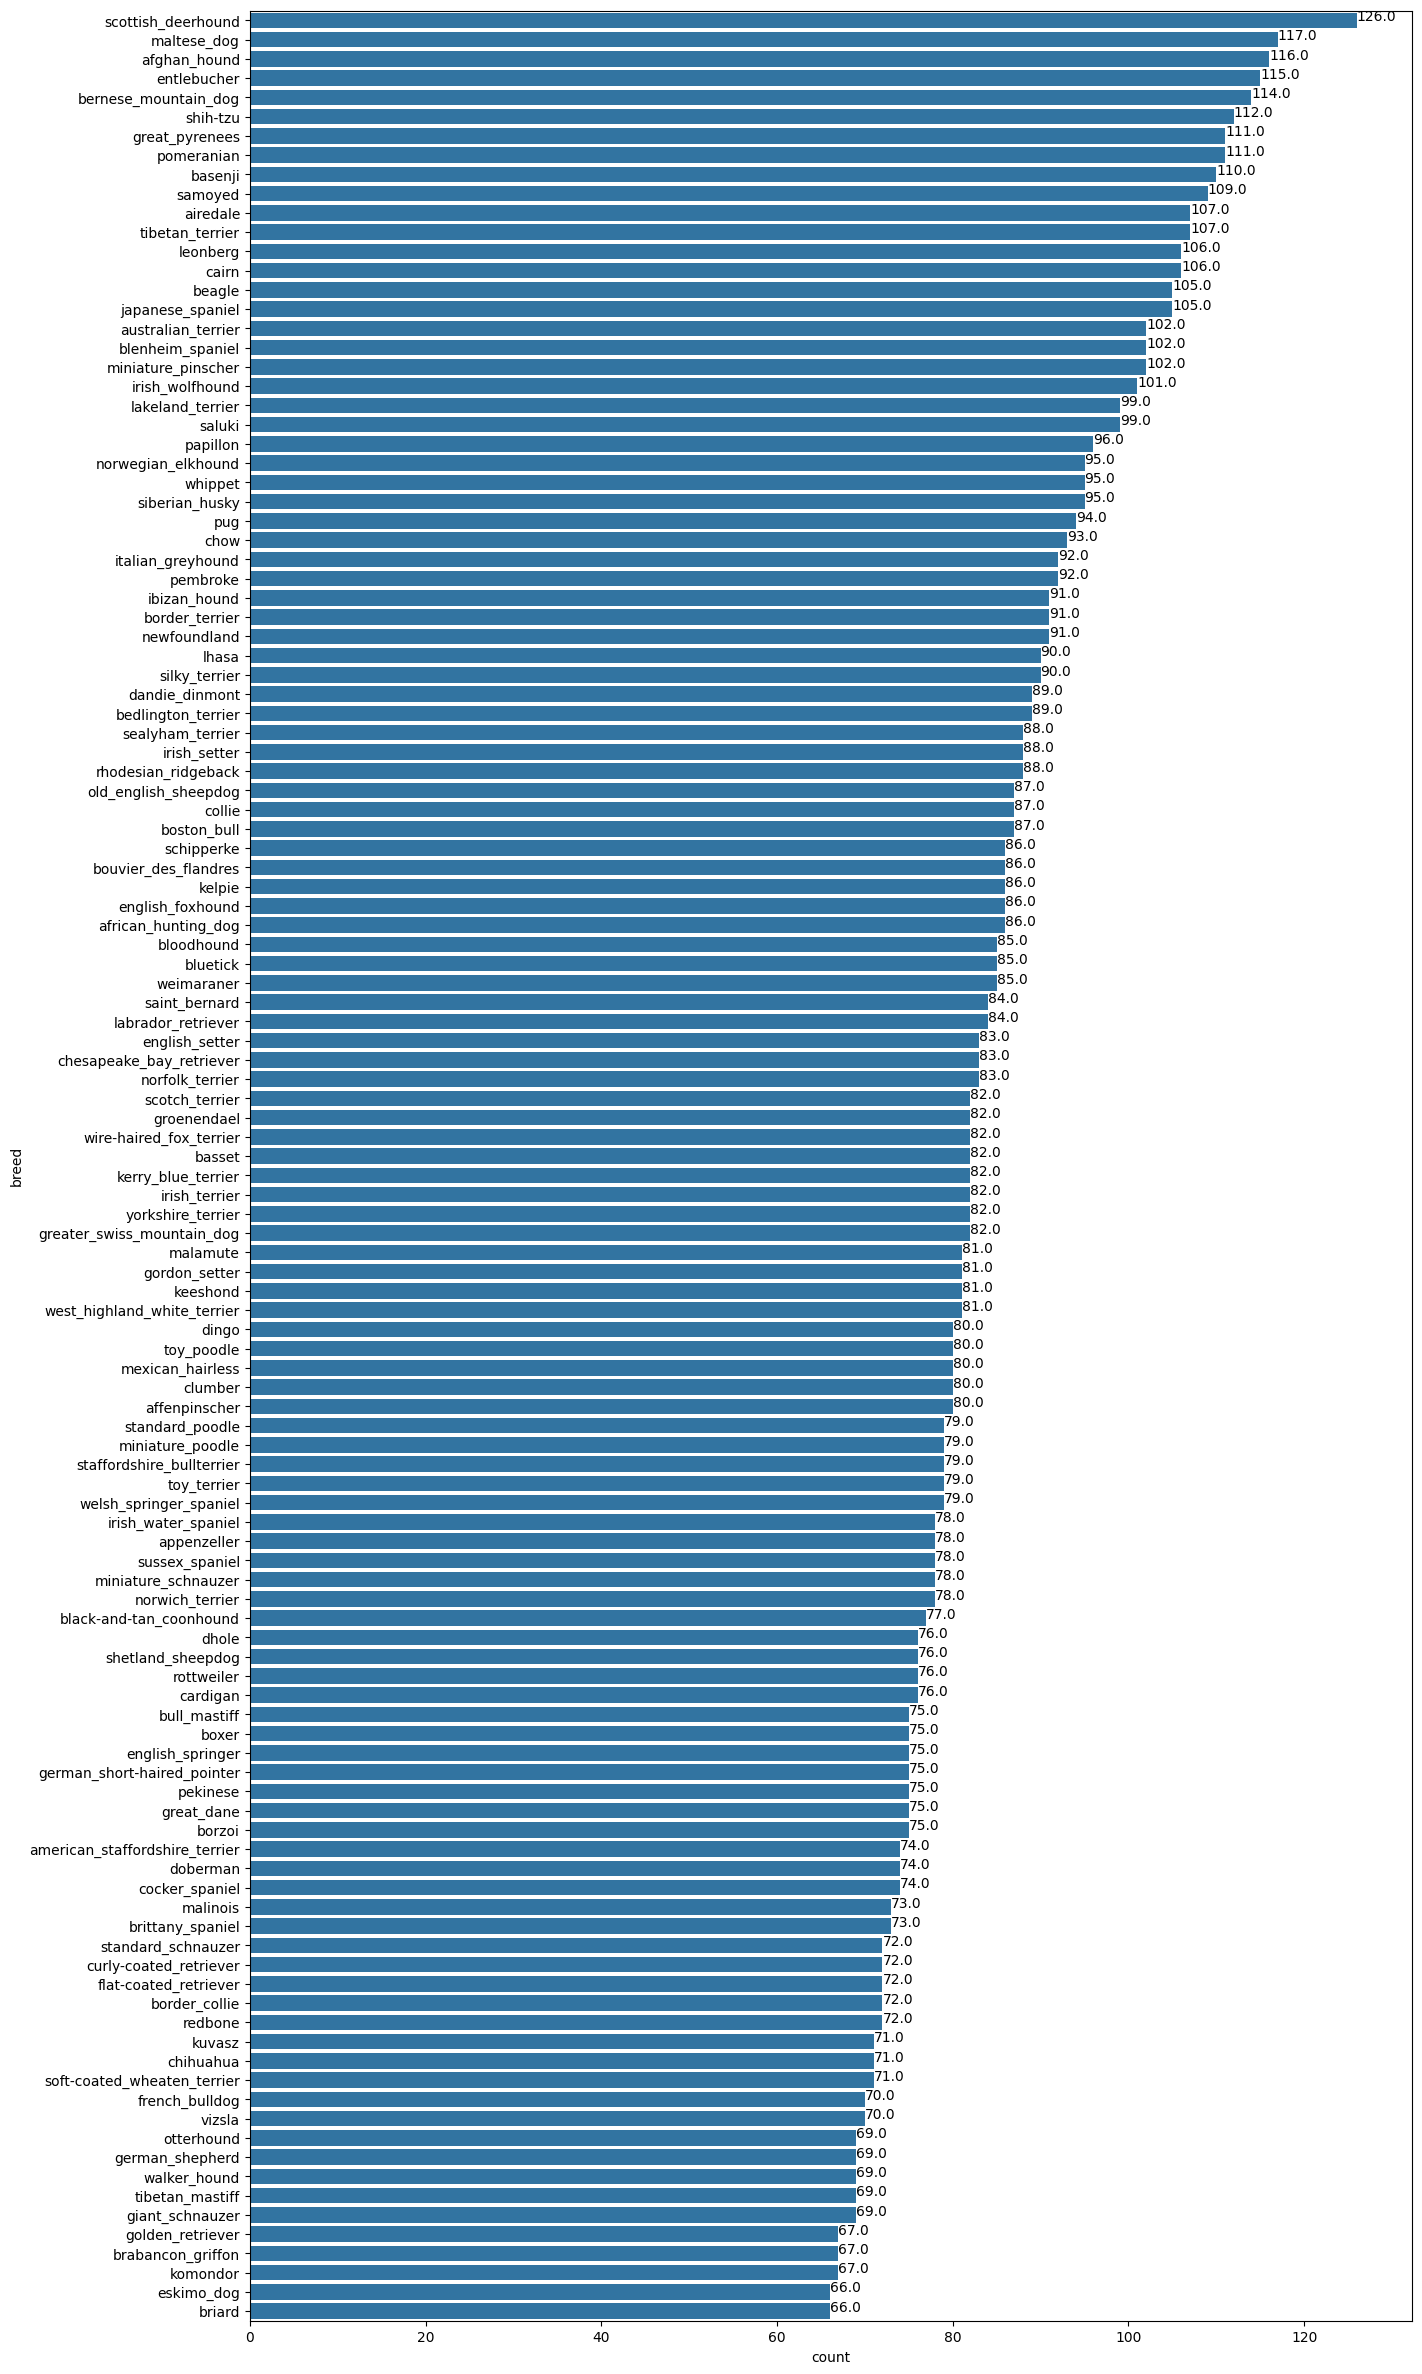

In [6]:
import pandas as pd
import seaborn as sns

labels = pd.read_csv('labels.csv')

def barw(ax):
    for p in ax.patches:
        val = p.get_width()
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(round(val,2), (x, y))

plt.figure(figsize=(15, 30))
ax0 = sns.countplot(y=labels['breed'], order = labels['breed'].value_counts().index)
barw(ax0)
plt.show()

Make sure that the number of dog images in the train folder match the number of labels:

In [9]:
if len(os.listdir('images/train/')) == len(labels['id']):
    print('Number of file names match number of labels.')

Number of file names match number of labels.


Let's check the total number of breeds and transform the breed type into a string format so the model can accurately read it.

In [12]:
breeds = sorted(list(set(labels['breed'])))
n_breeds = len(breeds)
print('Number of breeds:', n_breeds)

breed_to_num = dict(zip(breeds, range(n_breeds)))
breed_to_num

Number of breeds: 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

# Implementation:

* Loading a pre-trained model called VGG16, a convolutional neural network model that will be highly useful for an Image Classification Problem.
* Writing a function to preprocess images and extract features using the model.
* Extracting the features of each image and create a DataFrame.
* Save the features and labels to CSV.

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import numpy as np

# Load labels.csv which contains 'id' and 'breed'
labels_df = pd.read_csv('labels.csv')

# Load the VGG16 model, including the top fully connected layers
base_model = VGG16(weights='imagenet')
# Create a new model that will output the features from the 'fc1' layer of VGG16
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

def extract_features(image_path, model):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    
    # Get features
    features = model.predict(image)
    return features.flatten()

image_paths = [f'images/train/{row["id"]}.jpg' for index, row in labels_df.iterrows()]

# Extract features for each image and create a DataFrame
features_list = [extract_features(path, model) for path in image_paths]
features_df = pd.DataFrame(features_list)

# Include breed labels in the features DataFrame
features_df['breed'] = labels_df['breed'].values

# Set breed and id as the first columns
cols = features_df.columns.tolist()
cols = cols[-2:] + cols[:-2]
features_df = features_df[cols]

# Save the features and labels to CSV
features_df.to_csv('extracted_features.csv', index=False)
print("Features and labels saved to extracted_features.csv")

1/1 [==============================] - 0s 57ms/step
Features and labels saved to extracted_features.csv


Convert the features to a DataFrame

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'features' is a numpy array resulting from your model's prediction
# Let's say you also have an array of labels or identifiers for each feature vector
labels = np.array(['label1', 'label2', 'label3'])  # Example labels for each feature set

# Convert the features and labels into a DataFrame
df_features = pd.DataFrame(features, index=labels)
df_features.index.name = 'Label'
df_features.columns = [f'Feature_{i+1}' for i in range(df_features.shape[1])]

# Data Exploration

Explore the dataset to understand the size, quality, and variation of images. Also, examine the distribution of breeds in labels.csv.

In [11]:
import pandas as pd

# Load labels
labels_df = pd.read_csv('labels.csv')
print(labels_df.head())
print("Unique breeds:", labels_df['breed'].nunique())


                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
Unique breeds: 120


# Image and Breed Correlation Study

Analyze how certain features extracted from images correlate with dog breeds.

In [16]:
features_df = pd.read_csv('extracted_features.csv')
print(features_df.head())

   4095             breed         0          1    2         3          4  \
0   0.0       boston_bull  7.031771  11.451440  0.0  0.000000   0.000000   
1   0.0             dingo  0.000000   0.000000  0.0  0.000000   0.000000   
2   0.0          pekinese  0.000000   0.000000  0.0  1.967434   0.000000   
3   0.0          bluetick  0.000000   0.000000  0.0  0.000000  16.433384   
4   0.0  golden_retriever  5.882503   9.397577  0.0  0.000000   0.000000   

           5    6    7  ...  4085  4086  4087  4088      4089  4090  4091  \
0   0.000000  0.0  0.0  ...   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   
1   5.701201  0.0  0.0  ...   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   
2   0.000000  0.0  0.0  ...   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   
3  10.652593  0.0  0.0  ...   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   
4   7.932431  0.0  0.0  ...   0.0   0.0   0.0   0.0  3.478842   0.0   0.0   

       4092      4093      4094  
0  0.000000  0.000000  0.000000  
1  3.935082 

---

# Conclusions and Next steps

- Successful Feature Extraction

    The extraction of 4096 features for each image using a pre-trained VGG16 model was successful. This implies that each image has been transformed into a high-dimensional space where each dimension represents some level of abstraction captured by the model from ImageNet training. The dimensions might capture edges, textures, patterns, or more complex elements that are useful for distinguishing between different dog breeds.

- Data Quality and Readiness

    The feature set is robust, as evidenced by the large number of features (4096 per image), which are likely to capture a comprehensive range of information from the images.

- Breed Labels Integration

    The inclusion of breed labels in the DataFrame confirms that the data is ready for supervised learning tasks. It's possible to train the model to predict the breed based on these features, leveraging the labels for training and validation.

Next steps for Model Development:
Data processing is necessary before training the model.
More precisely standardizing and normalizing the feature data is crucial, specially since neural models like VGG16 can produce feature outputs that vary significantly in magnitude.


---